In [1]:
# Edit this cell to print out your name.
print "My name is %s" % ("Maxwell C. Arieda")

My name is Maxwell C. Arieda


# Predicting the weather

***For all of the questions in this project, assume that 1 month = 30 days.***

## Problem 1 (20 pts)

Suppose there is a 20% chance it will rain on any given day in a month. What are the odds that that rains on one and only one day in a month. 

Work this problem out a*nalytically* (with pen and paper, using a formula) and write it up in your final document.

Here you should solve the same problem *numerically* using a Monte Carlo approach, similar to how we approached the birthday problem in class. 

Make sure that both approaches give you a similar result. 

In [3]:
# Your code here
from numpy import random

def one_rainy_day():
    rain = 0
    random_number = random.random() # This generated a random number between 0 - 1.
    if random_number <= .2:
        rain = 1 # 1 is equivilent to rain
    return rain

def a_rainy_day_in_a_month():
    number_of_days = 30 
    outcome =0
    for i in range(0,number_of_days):
        outcome += one_rainy_day()
    if outcome == 1:
        return 1
    else:
        return 0

    
number_of_months = 100000 # The number of months we want to test.
outcome = 0
for i in range(0,number_of_months):
    outcome += a_rainy_day_in_a_month()
    
percentage = outcome/float(number_of_months)*100
print "The odds that it rains on one and only one day in a month with a 20 percent chance on each day, is %.4f percent" %(percentage)
#.9

The odds that it rains on one and only one day in a month with a 20 percent chance on each day, is 0.9530 percent


## Problem 2 (20 pts)

Suppose there is a 10% chance that it will rain on any given day in a month. What are the odds that it rains at least 8 days (in any order) that month?

Work this problem out *numerically* using a Monte Carlo approach. 

In [6]:
# Your code here
from numpy import random
def at_least_eight_rainy_days():
    random_number = random.random() # This generated a random number between 0 - 1.
    rain = 0 #0 means no rain
    if random_number <= .1:
        rain = 1 # 1 is equivilent to rain
    return rain

def eight_rainy_days_in_a_month():
    number_days = 30 
    outcomes = 0
    for i in range(0,number_days):
        outcomes += at_least_eight_rainy_days()    
    if outcomes >= 8:
        return 1
    else:
        return 0
    
number_months = 100000 # The number of months we want to test
outcomes = 0
for i in range(0,number_months):
    outcomes += eight_rainy_days_in_a_month()
percentage = outcomes/float(number_months)*100
print "The odds that it rains at least 8 days in any order with a 10 percent chance each day, is approximately %.4f percent" %(percentage)
#.8%

The odds that it rains at least 8 days in any order with a 10 percent chance each day, is approximately 0.8170 percent


## Problem 3 

### 3a (20 pts)

Suppose that if it rains one day, the odds of a certain amount of rainfall *on that day* are

* 1 cm   20%
* 2 cm   30%
* 3 cm   30%
* 4 cm   10%
* 5 cm   10%

However the odds of it raining are dependent on if it rained the day before.

* If it is the first day of the month, there is a 10% chance of rain.
* If it rained 1 day before, but not 2 days before, there is a 20% chance of rain. 
* If it rained both of the 2 days before, but not the 3rd day before, there is a 25% chance of rain.
* If it rained for the 3 days (or more) before, there is a 5% chance of rain. 
* Otherwise, there is a 10% chance of rain

What are the odds that there are at least 10 cm of rain in a given month?

Work this problem out using a Monte Carlo approach. 

In [18]:
# Your code here
given_rainfall = []
number_months = 10000
Swedish_Fish = []
#######################################################################################################
#######################################################################################################
for lime in range(0,number_months): # how many months were testing
    Two_Pac = []
    Days_it_rained = []
    number_of_days = 30 #days in  a month
    for Wutang in range(0,number_of_days): 
        Two_Pac.append(random.random()) # adds thirty random numbers between 0 and 1 to the Two_Pac list
    if Two_Pac[0] <= .1: #the 10% odd it rains day 1
        Days_it_rained.append(1) #if its true add 1 to the list 
    else:
        Days_it_rained.append(0) #If it doesnt rain, Add 0 to the list
    if Days_it_rained[0] == 1: #if it rained day one, then it goes into this if statement
        if Two_Pac[1] <= .20: #20 percentae chance of rain
            Days_it_rained.append(1) #it rains. Add to list
        else:
            Days_it_rained.append(0) #DIdnt rain. Addszero to the list
    else:
        if Two_Pac[1] <= .1: #day 2 if it didnt rain the day before
            Days_it_rained.append(1) 
        else:
            Days_it_rained.append(0)
    if Days_it_rained[1] == 1: #if it rained day two, go to this Nested If statements
        if Days_it_rained[0]==1: #if it rained day one, 
            if Two_Pac[2] <= .25: #Day one rained, Day two rained. Now 25 percent chnce on rain
                Days_it_rained.append(1)
            else:
                Days_it_rained.append(0)
        else:
            if Two_Pac[2] <= .1: # if it rained day one, but not two days before. Go to this nested loop. 
                Days_it_rained.append(1)
            else:
                Days_it_rained.append(0) 
    else:
        if Two_Pac[2] <= .10: #day 3 rainign is less than 10%. Didnt rain the day before
            Days_it_rained.append(1)
        else:
            Days_it_rained.append(0) 
#######################################################################################################
#######################################################################################################            
    for DMX in range(3,len(Two_Pac)): #loop thru day four thru day 30.
        if Days_it_rained[DMX-3] == 1: #if it rained 3 days before the current day were testing.
            if Days_it_rained[DMX-2] == 1: #test if it rained 2 days before
                if Days_it_rained[DMX-1] == 1: #test if it rained 1 day before
                    if Two_Pac[DMX] <= .05: #so if rained all 3 days before, Now rain % is .05
                        Days_it_rained.append(1)
                    else:
                        Days_it_rained.append(0)
                else:
                    if Two_Pac[DMX] <=.1: # if it didnt rain the day before, 10 % hanceof rain>
                         Days_it_rained.append(1)
                    else:
                        Days_it_rained.append(0)
            else:
                if Days_it_rained[DMX-1] == 1: # didnt rain two days before, but still need to test if it rained Days_it_rainedterday. Day before
                    if Two_Pac[DMX] <= .2: #if it did rain, 20% chance
                        Days_it_rained.append(1)
                    else:
                        Days_it_rained.append(0)
                else:
                    if Two_Pac[DMX] <= .1: # if it didnt rain the day before, only 10 oercent chance
                        Days_it_rained.append(1)
                    else:
                        Days_it_rained.append(0) 
        else: # it didnt rain three days before. Go to This nested if statement
            if Days_it_rained[DMX-2] == 1: #itrained 2 days before
                if Days_it_rained[DMX-1] == 1: # and it rained one day before
                    if Two_Pac[DMX] <= .25: #theres a 25 % chance it Two_Pac
                        Days_it_rained.append(1)
                    else:
                        Days_it_rained.append(0)
                else:
                    if Two_Pac[DMX] <= .1: # Didnt rain the day before, but rained two days before. 10%
                            Days_it_rained.append(1)
                    else:
                            Days_it_rained.append(0)
            else: #didnt rain two days before But still have to check if it rained the day before
                if Days_it_rained[DMX-1] == 1:
                    if Two_Pac[DMX] <= .2: # if it did rain the day before, 20% chance
                        Days_it_rained.append(1)
                    else:
                        Days_it_rained.append(0)
                else:

                    if Two_Pac[DMX] <= .1: #if it didnt rain the day before 10% chance
                        Days_it_rained.append(1)
                    else:
                        Days_it_rained.append(0) 
                        
#######################################################################################################
#######################################################################################################                        
    values = [] #the amount of rain each day. Gives lists of 1-5
    for lemon in range(0,sum(Days_it_rained)): #Days_it_rained is all ones and zeros. The ACTUAL NUMBER of days it Two_Pac
        TGIF = random.random()
        if TGIF <= .2:          #Takes the number of days it rained, generates a random number for 
                                #Each day, and with the percenatge generated it determines how much it Two_Pac. 
            values.append(1)
        elif TGIF > .2 and TGIF <= .5:
            values.append(2)
        elif TGIF > .5 and TGIF <= .8:
            values.append(3)
        elif TGIF > .8 and TGIF <= .9:
            values.append(4)
        elif TGIF >.9:
            values.append(5)
    if sum(values) >= 10:
        given_rainfall.append(1)
#######################################################################################################
#######################################################################################################        
        
        #given_rainfall = float(given_rainfall)
        #Sweidsh_Fish = float(Sweidsh_Fish)
        number_months = float(number_months)
    
    Swedish_Fish.append(sum(values))
print "The odds of at least 10cm of rain in a given month is approximately %.4f %%" % (sum(given_rainfall)/(number_months)*100)

The odds of at least 10cm of rain in a given month is approximately 38.8500 %


### 3b (10 pts)

Make a histogram of the distribtion of expected rainfall values. You can get this from your Monte Carlo trials. 

Make sure you label everything clearly. 

<IPython.core.display.Javascript object>


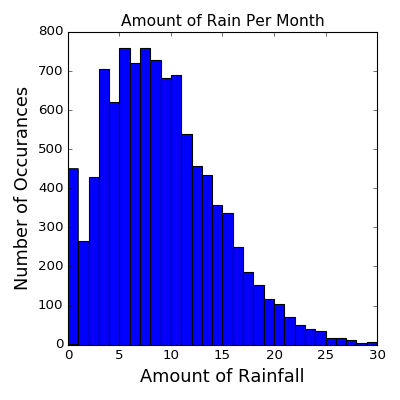

In [32]:
# Your code here
import numpy as np
import matplotlib.pylab as plt
%matplotlib notebook

plt.figure(figsize=(5,5))

plt.hist(Swedish_Fish,bins=30,range=(0,30)) 

plt.xlabel("Amount of Rainfall",fontsize=16)
plt.ylabel("Number of Occurances",fontsize=16)

plt.title("Amount of Rain Per Month",fontsize=14)
plt.tight_layout()

### 3c (10 pts)

What is the average amount of rain to fall in any given month? 



In [26]:
# Your code here
EDM_OR_DUBSTEP = 0 #counter variable
avg = sum(Swedish_Fish)/number_months
print "The average amount of rainfall in a month is: %.3f cm." % (avg)
#8.5cm

The average amount of rainfall in a month is: 8.545 cm.


### 3d (20)

Once you find the average value, someone might ask you for the uncertainty (some people also refer to uncertainty as the "*error*") on your prediction. That can be tricky to calculate, so often what is given is just a *range* of possible values. "We estimate the rainfall to be between X cm and Y cm." The question is, how to decide what that range is. 

The way this is often done is to find the middle 95% of the trial values (from your Monte Carlo run) and then use the low-edge and the high-edge of that range. If you're concerned about the middle 95%, then 2.5% of the values are below them and 2.5% of all the values are above them. The rainfall values at those edges are what you use for the ranges to quote. 

This is what people mean when they say, "I'm 95% confident that the rainfall will be between X and Y", and when you write it up for the LaTeX document, you should also quote it this way. 

*Hint!* This part becomes much easier if you sort all the values using any of the numpy/Python sort functions you can read about online. When you sort them, you should be able to find what rainfall is at the edge for the lower 2.5% and the higher 2.5%. 

In [31]:
# Your code here
import numpy as np
a = np.array(Swedish_Fish)
Lower_range = np.percentile(a,2.5)
print "The low-edge range of this data array is %.1f." % (Lower_range)

Higher_Range = np.percentile(a,97.5)
print "The high-edge range of this data array is %.1f." % (Higher_Range)
print 
print "I'm 95% confident that the rainfall will be between 0 and 21 cm!" 

The low-edge range of this data array is 0.0.
The high-edge range of this data array is 21.0.

I'm 95% confident that the rainfall will be between 0 and 21 cm!
